# Analisando os resultados
## Conjunto de dados reduzido

In [1]:
import pandas as pd
dados = pd.read_csv('checkpoint_resultados_reduzido.csv', sep=',', decimal = ',', encoding = 'UTF-8')
dados.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
0,1,2,"É engraçado que, se formos seguir a lógica do ...",A paternidade deveria ser considerada nas disc...,"E a paternidade, Sra. Ministra ? Considerando ...",Concorda,CONCORDA,A mensagem atual concorda com a ideia central ...
1,1,3,"Na hora de abortar é escolha da mulher, na hor...",A paternidade deveria ser considerada nas disc...,"É engraçado que, se formos seguir a lógica do ...",Concorda,DISCORDA,A mensagem atual contesta a ideia de equiparaç...
2,1,4,Sabe qual é o bizarro em um contexto onde o ab...,A paternidade deveria ser considerada nas disc...,"Na hora de abortar é escolha da mulher, na hor...",Concorda,CONCORDA,A mensagem atual expande e aprofunda o argumen...
3,1,5,"Alguns pontos, concordo que em caso do aborto ...",A paternidade deveria ser considerada nas disc...,Sabe qual é o bizarro em um contexto onde o ab...,Concorda,CONCORDA,A mensagem atual demonstra concordância com a ...
4,1,6,Em relação ao último ponto é para evitar que a...,A paternidade deveria ser considerada nas disc...,"Alguns pontos, concordo que em caso do aborto ...",Outros,CONCORDA,A mensagem atual continua a desenvolver o argu...


É necessário tratar as anomalias geradas pela IA e normalizar os rótulos

In [2]:
dados['classificacao'].value_counts()

classificacao
DISCORDA        267
CONCORDA        183
OUTROS          177
OUTROS]           2
**DISCORDA**      1
DISCORDA]         1
Name: count, dtype: int64

In [3]:
# Tratando as anomalias das classificações geradas pela IA
dados['classificacao'] = dados['classificacao'].str.strip('*]')

In [4]:
dados['classificacao'].value_counts()

classificacao
DISCORDA    269
CONCORDA    183
OUTROS      179
Name: count, dtype: int64

In [5]:
# normalizando a classificação para ficar igual a label
dados['classificacao'] = dados['classificacao'].str.capitalize()

In [6]:
dados['classificacao'].value_counts()

classificacao
Discorda    269
Concorda    183
Outros      179
Name: count, dtype: int64

In [7]:
dados['label_original'].value_counts()

label_original
Discorda    235
Concorda    228
Outros      168
Name: count, dtype: int64

# Utilizando os resultados do conjunto de dados completo

In [8]:
import pandas as pd
dados = pd.read_csv('checkpoint_resultados_completo.csv', sep=',', decimal = ',', encoding = 'UTF-8')
dados.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
0,1,2,"E olha que aqui tá cheio de liberais no sub, m...",Eu acho que a direita está sendo hipócrita ao ...,"Incoerência da direita: pregam menos Estado, l...",Concorda,CONCORDA,A mensagem atual concorda com a crítica implíc...
1,1,3,Daí dizem que defender o controle do Estado na...,Eu acho que a direita está sendo hipócrita ao ...,"E olha que aqui tá cheio de liberais no sub, m...",Concorda,CONCORDA,A mensagem atual reforça a crítica à hipocrisi...
2,1,4,Faz uma enquete sobre legalização do aborto pa...,Eu acho que a direita está sendo hipócrita ao ...,Daí dizem que defender o controle do Estado na...,Concorda,OUTROS,A mensagem atual muda o foco da discussão orig...
3,1,5,Pois é... outra vez: aborto não é questão de E...,Eu acho que a direita está sendo hipócrita ao ...,Faz uma enquete sobre legalização do aborto pa...,Concorda,CONCORDA,A mensagem atual estende a crítica à intromiss...
4,1,6,"Se depender dos conservadores, eles vão proibi...",Eu acho que a direita está sendo hipócrita ao ...,Pois é... outra vez: aborto não é questão de E...,Concorda,CONCORDA,A mensagem atual reforça a crítica à hipocrisi...


In [9]:
dados['classificacao'].value_counts()

classificacao
OUTROS                            702
DISCORDA                          676
CONCORDA                          622
CONCORDA]                           6
DISCORDA]                           3
DISCORDA`\n`                        2
[CONCORDA / DISCORDA / OUTROS]      2
OUTROS]                             2
DISCORDA`                           1
/                                   1
Name: count, dtype: int64

## Identificando e tratando anomalias

In [10]:
# Tratando as anomalias das classificações geradas pela IA
dados['classificacao'] = dados['classificacao'].str.strip('*]`\n')

In [11]:
# Identificando as anomalias
dados['classificacao'].value_counts()

classificacao
OUTROS                           704
DISCORDA                         682
CONCORDA                         628
[CONCORDA / DISCORDA / OUTROS      2
/                                  1
Name: count, dtype: int64

In [12]:
# O agente não conseguiu distinguir qual é a classificação de algumas das linhas, expondo elas:
dados[(dados['classificacao'] == '[CONCORDA / DISCORDA / OUTROS') | (dados['classificacao'] == '/')]

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa
1155,139,12,Ninguém liga pra visão religiosa. Casamento te...,Eu acho que casamento entre pessoas do mesmo s...,"Não é casamento, pois o casamento pressupõe a ...",Discorda,[CONCORDA / DISCORDA / OUTROS,[1 a 3 frases explicando de forma clara e obje...
1816,218,11,[removed],Os 10 posts mais complicados de lidar dos mode...,[removed],Outros,[CONCORDA / DISCORDA / OUTROS,[1 a 3 frases explicando de forma clara e obje...
1852,223,5,"Privacidade????????\n\nAmigo, pesquisa aí sobr...",Eu acho que as pessoas estão se enganando ao d...,O post e 80% dos comentários se achando muito ...,Discorda,/,]\nCLASSIFICAÇÃO: DISCORDA\nJUSTIFICATIVA: A m...


In [13]:
# Pode-se observar que na verdade o modelo não respeitou a formatação solicitada. Verificando se a resposta está na justificativa:
conteudo = dados.loc[1155, "justificativa"]
print(conteudo)

print('--------------------------')

conteudo = dados.loc[1816, "justificativa"]
print(conteudo)

print('--------------------------')

conteudo = dados.loc[1852, "justificativa"]
print(conteudo)

[1 a 3 frases explicando de forma clara e objetiva o motivo da classificação]
```

Exemplos:
CONCORDA
Mensagem de referência: Eu acho que a criminalização do aborto é um exemplo claro de como a religião pode influenciar a política de forma injusta.
Mensagem atual: Apontar que um feto é uma vida não é suficiente para criminalizar o aborto. Precisamos de critérios objetivos.
Justificativa: A mensagem atual concorda com o argumento da referência ao defender a descriminalização com base em critérios objetivos, reforçando a crítica à influência religiosa.

DISCORDA
Mensagem de referência: O aborto não é aceitável pois um feto é uma vida.
Mensagem atual: O DNA não é critério suficiente para definir humanidade, e o direito à vida deveria considerar outras características.
Justificativa: A mensagem atual contradiz diretamente o argumento da referência, ao questionar a base para considerar o feto como portador de direitos.

OUTROS
Mensagem de referência: A relativização do direito à vida abre p

Percebe-se que as linhas 1816 e 1852 possuem um rótulo e uma justificativa, porém a formatação não veio adequada, irei extraí-los com base no que está no campo de justificativa

### Extraindo resposta do campo justificativa

In [14]:
# Definindo a função que trata a saída
def tratar_saida(saida):
    texto = saida.strip()

    import re
    padrao = r"CLASSIFICAÇÃO:\s*(.*?)\s*JUSTIFICATIVA:\s*(.*)"
    match = re.search(padrao, texto, re.DOTALL)

    if match:
        classificacao = match.group(1).strip()
        justificativa = match.group(2).strip()

    return classificacao, justificativa

In [15]:
# Tratando cada uma das linhas
classificacao, justificativa = tratar_saida(dados.loc[1816, "justificativa"])

dados.loc[1816, ['classificacao', 'justificativa']] = [classificacao, justificativa]

In [16]:
# Tratando cada uma das linhas
classificacao, justificativa = tratar_saida(dados.loc[1852, "justificativa"])

dados.loc[1852, ['classificacao', 'justificativa']] = [classificacao, justificativa]

### Chamando o agente para a linha 1155

In [17]:
# obtendo o prompt ideal para a linha 1155
prompt = """
### CONVERSA (com rótulos anteriores):
[1] MENSAGEM RAIZ: Eu acho que casamento entre pessoas do mesmo sexo não é casamento, porque casamento pressupõe geração de prole como parte da natureza dos esposos. Então, se o estado permitir que pessoas do mesmo sexo se casem, isso vai diminuir o significado do que é o casamento de verdade, que é a coisa mais importante da sociedade. Se liberar o termo casamento então para situações onde não seja gerado um filho, poderiamos usar ele para situações como masturbação mútuas entre pessoas.
[2] Anthony_Mcmillan - RESPONDE A [1]: Pessoas estéreis, que realizaram vasectomia ou na terceira idade também deveriam ser proibidas de casar? Pessoas que optam por não ter filhos poderiam ter seus casamentos anulados após X anos? [DISCORDA]
[3] Kevin_Whitehead - RESPONDE A [2]: \"pois o casamento pressupõe a capacidade de geração de prole como parte da natureza dos esposos.\"\n\nA capacidade cabeçudo, a capacidade é o estado natural e a esterelidade é a excessão, esquerdopata sempre tem dificuldade de entender lógica básica. [CONCORDA]
[4] Charles_Vega - RESPONDE A [2]: A pessoa que é impotente não pode se casar, pois falta-lhe a potência\n\nA pessoa que é infértil pode, pois a infertilidade não é a falta de potência.\n\nNão cabe ao estado ter uma tabela de cada pessoa e suas potencias. Cabe as pessoas conhecidas dos noivos denunciarem ao público se conhecerem algum impedimento, que então há de ser investigado.\n\nPessoas que não abertas a terem filhos não devem, porém podem, ter seus casamentos outorgados pelo estado in limine se não antes outorgado pela Igreja, já que para o estado interessa somente a continuação da nação através da prole. Esses casamentos são chamados de casamentos josefinos e requerem uma autorização especial do bispo local. [CONCORDA]
[5] Samantha_Carlson - RESPONDE A [1]: \"casamento, pois o casamento pressupõe a capacidade de geração de prole como parte da natureza dos esposos.\"\n\nNao, ha casais onde um dos conjuges nao podem ter filhos mas podem constituir familia via adoçao. Problema dessa passagem no congresso , pessoalmente, é desconsiderar a uniao estavel como unidade familiar, que impediria esses casos. Alias , deputados a favor dessa maldadr foram bem enfaticos quanto a isdi [DISCORDA]
[6] Charles_Vega - RESPONDE A [5]: Se um dos cônjuges não pode ter filhos, e era sabido durante a  cerimônia, então eles não estão casados. [CONCORDA]
[7] Eric_Parker - RESPONDE A [6]: Só pode casar quem quer ter filhos e quem pode ter filhos?\nPorra, jovem... [DISCORDA]
[8] Charles_Vega - RESPONDE A [7]: Sim. [CONCORDA]
[9] Ryan_Bright - RESPONDE A [1]:  \n\nEntendo que o casamento é uma parte essencial da nossa sociedade e evoluiu ao longo do tempo para refletir a diversidade de relacionamentos e famílias que existem. Antigamente, ele tinha um foco mais na prole, mas hoje, compreendemos que ele vai muito além disso. Casamento é sobre amor, compromisso e respeito mútuo.\n\nPermitir que casais gays se casem é um passo importante em direção à igualdade e inclusão. Isso não diminui o significado do casamento, pelo contrário, mostra que ele pode ser uma expressão de amor em todas as suas formas. Cada casal, independente da orientação, contribui para a riqueza e diversidade da nossa sociedade.\n\nÉ também uma questão de respeitar os direitos humanos fundamentais, incluindo o direito de se casar e formar uma família, independentemente da orientação sexual. Ao apoiar o casamento entre pessoas do mesmo sexo, estamos construindo uma sociedade mais inclusiva e justa para todos. [DISCORDA]
[10] Charles_Vega - RESPONDE A [9]: \\>  compreendemos que ele vai muito além disso. Casamento é sobre amor, compromisso e respeito mútuo. \n\nCasamento vai muito além disso, inclui a prole. [CONCORDA]
[11] Kent_Blankenship - RESPONDE A [1]: Perfeito comentário. [CONCORDA]
### MENSAGEM ATUAL:
Samantha_Gonzalez - RESPONDE A [1]: Ninguém liga pra visão religiosa. Casamento tem um sentido legal além da religião, com implicações em herança, dependências, adoção e diversas outras coisas.
### MENSAGEM DE REFERÊNCIA:
Eu acho que casamento entre pessoas do mesmo sexo não é casamento, porque casamento pressupõe geração de prole como parte da natureza dos esposos. Então, se o estado permitir que pessoas do mesmo sexo se casem, isso vai diminuir o significado do que é o casamento de verdade, que é a coisa mais importante da sociedade. Se liberar o termo casamento então para situações onde não seja gerado um filho, poderiamos usar ele para situações como masturbação mútuas entre pessoas.
Classifique o posicionamento da **mensagem atual** com relação à **mensagem de referência**. Leve em consideração todo o contexto.
"""

#### Função para utilizar o LLM

In [18]:
from openai import OpenAI
import os
import dotenv

dotenv.load_dotenv()

def consultar_llm(prompt):
    client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    )

    completion = client.chat.completions.create(
    model="google/gemma-3-27b-it:free",
    temperature=0.0,
    top_p=1.0,  
    messages=[
        {
"role": "system",
"content": """ Você é um detector contextual de posicionamento. Sua função é analisar uma mensagem atual, levando em consideração:

1. A conversa completa até o momento, composta por múltiplas mensagens anteriores, cada uma com um rótulo de posicionamento (CONCORDA, DISCORDA ou OUTROS), que indica como cada uma se posicionou em relação à sua própria mensagem de referência.
2. A mensagem de referência, que é o ponto de partida para a análise da mensagem atual.

Sua tarefa é classificar o posicionamento da mensagem atual em relação à mensagem de referência, com base no conteúdo e no contexto fornecido.

Rótulos possíveis:
1. CONCORDA – A mensagem atual expressa apoio, reforço ou alinhamento com o posicionamento da mensagem de referência. Pode repetir ideias, defender o mesmo ponto de vista ou responder positivamente à argumentação.
2. DISCORDA – A mensagem atual refuta, contesta ou critica o ponto de vista da mensagem de referência. Pode conter contra-argumentos, ironia crítica ou rejeição explícita das ideias anteriores.
3. OUTROS – A mensagem atual não expressa um posicionamento claro. Pode conter perguntas, pedidos de definição, comentários irrelevantes ou neutros, mudança de assunto ou ironia ambígua.

Instruções:
- Utilize a mensagem de referência como âncora para o julgamento.
- As mensagens anteriores (com seus respectivos rótulos) servem como contexto auxiliar, ajudando a interpretar o tom e a progressão da conversa.
- Não infira sentimentos nem intenções além do necessário: baseie-se em evidências explícitas ou logicamente implícitas.
- Quando houver ambiguidade ou neutralidade, classifique como OUTROS.

Formato de resposta:
```
CLASSIFICAÇÃO: [CONCORDA / DISCORDA / OUTROS]
JUSTIFICATIVA: [1 a 3 frases explicando de forma clara e objetiva o motivo da classificação]
```

Exemplos:
CONCORDA
Mensagem de referência: Eu acho que a criminalização do aborto é um exemplo claro de como a religião pode influenciar a política de forma injusta.
Mensagem atual: Apontar que um feto é uma vida não é suficiente para criminalizar o aborto. Precisamos de critérios objetivos.
Justificativa: A mensagem atual concorda com o argumento da referência ao defender a descriminalização com base em critérios objetivos, reforçando a crítica à influência religiosa.

DISCORDA
Mensagem de referência: O aborto não é aceitável pois um feto é uma vida.
Mensagem atual: O DNA não é critério suficiente para definir humanidade, e o direito à vida deveria considerar outras características.
Justificativa: A mensagem atual contradiz diretamente o argumento da referência, ao questionar a base para considerar o feto como portador de direitos.

OUTROS
Mensagem de referência: A relativização do direito à vida abre portas para outros crimes, como o estupro.
Mensagem atual: Defina "espécie Homo sapiens".
Justificativa: A mensagem atual não se posiciona sobre o conteúdo da referência, apenas solicita uma definição.
"""
    },
    {
    "role": "user",
    "content": prompt
    }
    ]
    )

    return (completion.choices[0].message.content)

In [19]:
resposta = consultar_llm(prompt)
classificacao, justificativa = tratar_saida(resposta)

print(classificacao)
print('-------------------')
print(justificativa)

DISCORDA
-------------------
A mensagem atual discorda da mensagem de referência ao afirmar que a visão religiosa sobre o casamento é irrelevante e que o casamento possui um significado legal que transcende a questão da procriação. Ela apresenta argumentos práticos e legais que contradizem a definição restritiva de casamento proposta na mensagem de referência.


A resposta do LLM pode variar, principalmente a sua justificativa, por isso, estou colocando a primeira resposta manualmente como classificação e justificativa

In [20]:
classificacao = 'DISCORDA'
justificativa = 'A mensagem atual discorda da mensagem de referência ao desconsiderar a importância da visão religiosa e ao focar no aspecto legal do casamento, que transcende a questão da procriação. Ela argumenta que o casamento possui implicações legais importantes independentemente da capacidade de gerar filhos, o que contrasta com a premissa central da mensagem de referência.'

In [21]:
dados.loc[1155, ['classificacao', 'justificativa']] = [classificacao, justificativa]

In [22]:
dados.loc[1155]

target_id                                                       139
mensagem_id                                                      12
message           Ninguém liga pra visão religiosa. Casamento te...
target_message    Eu acho que casamento entre pessoas do mesmo s...
parent_message    Não é casamento, pois o casamento pressupõe a ...
label_original                                             Discorda
classificacao                                              DISCORDA
justificativa     A mensagem atual discorda da mensagem de refer...
Name: 1155, dtype: object

## Verificando as classificações pós-tratamento

In [23]:
dados['classificacao'].value_counts()

classificacao
OUTROS      705
DISCORDA    684
CONCORDA    628
Name: count, dtype: int64

In [24]:
# normalizando a classificação para ficar igual a label
dados['classificacao'] = dados['classificacao'].str.capitalize()

In [25]:
dados['label_original'].value_counts()

label_original
Concorda    708
Outros      692
Discorda    617
Name: count, dtype: int64

# Extraindo as métricas

In [26]:
# realizando os imports necessários
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# definindo o y verdadeiro e o y predito
y_true = dados['label_original']
y_pred = dados['classificacao']

In [28]:
# Calculando cada uma das métricas
acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred, average='weighted')  # weighted para lidar com classes desbalanceadas
revocacao = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Revocação: {revocacao:.4f}")
print(f"F1-score: {f1:.4f}")

Acurácia: 0.6311
Precisão: 0.6333
Revocação: 0.6311
F1-score: 0.6309


In [29]:
# obtendo o relatório completo de classificação
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

    Concorda       0.66      0.58      0.62       708
    Discorda       0.60      0.66      0.63       617
      Outros       0.64      0.65      0.64       692

    accuracy                           0.63      2017
   macro avg       0.63      0.63      0.63      2017
weighted avg       0.63      0.63      0.63      2017



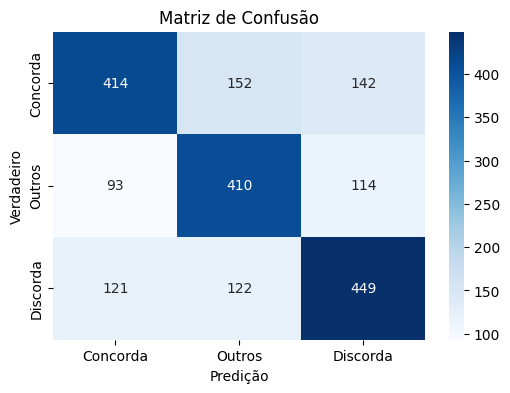

In [30]:
# visualizando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dados['label_original'].unique(),
            yticklabels=dados['label_original'].unique())
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

## Conclusões extraídas das métricas

O rótulo com melhor desempenho foi o "Outros". Obtendo um melhor resultado em f1-score (que é o balanço entre sensibilidade e precisão).  
  
O rótulo que obteve a melhor sensibilidade, ou seja, quando um dado com um determinado rótulo passa pelo modelo, o modelo acerta seu rótulo, foi o Discorda, com o valor de 66%.  
  
O rótulo que obteve a melhor precisão, ou seja, quando o modelo diz que um determinado dado pertence a um rótulo, ele realmente tem este rótulo, foi o Concorda, com o valor de 66%.  
  
Ademais, o resultado para todo o conjunto possui um resultado de 63% nas principais métricas (acurácia, f1, recall e precisão [com médias macro e ponderadas])

## Enriquecimento dos dados

Adicionando qual o assunto da conversa para uma melhor análise dos resultados.

### Tratando o conjunto de dados que possui o assunto

In [31]:
# Leitura e tratamento dos rótulos
dados_assunto = pd.read_csv('./conjuntoDeDadosAssunto.tsv', sep='\t', decimal = ',', encoding = 'UTF-8')

dados_assunto = dados_assunto[(dados_assunto['label'] != 'Alvo da conversa') & (dados_assunto['label'] != 'Comentário Original') & (dados_assunto['label'].notna())]


dados_assunto['label'] = dados_assunto['label'].replace('Discute', 'Outros')
dados_assunto['label'] = dados_assunto['label'].replace('Irrelevante', 'Outros')
dados_assunto['label'] = dados_assunto['label'].replace('Pede Informações', 'Outros')

dados_assunto['parent_label'] = dados_assunto['parent_label'].replace('Discute', 'Outros')
dados_assunto['parent_label'] = dados_assunto['parent_label'].replace('Irrelevante', 'Outros')
dados_assunto['parent_label'] = dados_assunto['parent_label'].replace('Pede Informações', 'Outros')

In [32]:
# Implementando a lógica de id sequencial
df = dados_assunto.copy()

# Função para renumerar ids dentro de cada target_id
def renumerar_ids(grupo):
    mapping = {old_id: i+1 for i, old_id in enumerate(grupo['id'].unique())}
    grupo['id'] = grupo['id'].map(mapping)
    grupo['parent_id'] = grupo['parent_id'].map(mapping)
    return grupo

# Aplicar por target_id
df = df.groupby('target_id', group_keys=False).apply(renumerar_ids)

# Conferir resultado
dados_assunto = df.sort_values(by=['target_id', 'id'])
dados_assunto.head(3)

C:\Users\digog\AppData\Local\Temp\ipykernel_13468\3084037080.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('target_id', group_keys=False).apply(renumerar_ids)


,assunto,target_id,target_message,id,parent_id,author,parent_name,parent_message,message,parent_label,target_parent_message,target_and_message,label
0,drogas,1,Eu acho que a direita está sendo hipócrita ao ...,1,NaN,Gerald_Huber,Raiz,NaN,"Incoerência da direita: pregam menos Estado, l...",Alvo da conversa,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
1,drogas,1,Eu acho que a direita está sendo hipócrita ao ...,2,1.0,Jeremy_Newman,Gerald_Huber,"Incoerência da direita: pregam menos Estado, l...","E olha que aqui tá cheio de liberais no sub, m...",Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
2,drogas,1,Eu acho que a direita está sendo hipócrita ao ...,3,2.0,Gerald_Huber,Jeremy_Newman,"E olha que aqui tá cheio de liberais no sub, m...",Daí dizem que defender o controle do Estado na...,Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda


In [33]:
# Removendo as mensagens sem parent ID
dados_assunto = dados_assunto[dados_assunto['id'] != 1]

# garantindo que as labels importantes para a nova estrutura de dados que será aplicada funcione
dados_assunto["id"] = pd.to_numeric(dados_assunto["id"], errors="coerce")
dados_assunto["parent_id"] = pd.to_numeric(dados_assunto["parent_id"], errors="coerce").astype('Int64')

dados_assunto.head(3)

,assunto,target_id,target_message,id,parent_id,author,parent_name,parent_message,message,parent_label,target_parent_message,target_and_message,label
1,drogas,1,Eu acho que a direita está sendo hipócrita ao ...,2,1,Jeremy_Newman,Gerald_Huber,"Incoerência da direita: pregam menos Estado, l...","E olha que aqui tá cheio de liberais no sub, m...",Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
2,drogas,1,Eu acho que a direita está sendo hipócrita ao ...,3,2,Gerald_Huber,Jeremy_Newman,"E olha que aqui tá cheio de liberais no sub, m...",Daí dizem que defender o controle do Estado na...,Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda
3,drogas,1,Eu acho que a direita está sendo hipócrita ao ...,4,3,Jeremy_Newman,Gerald_Huber,Daí dizem que defender o controle do Estado na...,Faz uma enquete sobre legalização do aborto pa...,Concorda,Eu acho que a direita está sendo hipócrita ao ...,Eu acho que a direita está sendo hipócrita ao ...,Concorda


In [34]:
# Fazendo merge, mantendo todas as colunas de dados e apenas "assunto" de dados_assunto
df_enriquecido = pd.merge(
    dados,
    dados_assunto[["id", "target_id", "assunto"]],
    left_on=["mensagem_id", "target_id"],
    right_on=["id", "target_id"]
).drop(columns=["id"])

df_enriquecido.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa,assunto
0,1,2,"E olha que aqui tá cheio de liberais no sub, m...",Eu acho que a direita está sendo hipócrita ao ...,"Incoerência da direita: pregam menos Estado, l...",Concorda,Concorda,A mensagem atual concorda com a crítica implíc...,drogas
1,1,3,Daí dizem que defender o controle do Estado na...,Eu acho que a direita está sendo hipócrita ao ...,"E olha que aqui tá cheio de liberais no sub, m...",Concorda,Concorda,A mensagem atual reforça a crítica à hipocrisi...,drogas
2,1,4,Faz uma enquete sobre legalização do aborto pa...,Eu acho que a direita está sendo hipócrita ao ...,Daí dizem que defender o controle do Estado na...,Concorda,Outros,A mensagem atual muda o foco da discussão orig...,drogas
3,1,5,Pois é... outra vez: aborto não é questão de E...,Eu acho que a direita está sendo hipócrita ao ...,Faz uma enquete sobre legalização do aborto pa...,Concorda,Concorda,A mensagem atual estende a crítica à intromiss...,drogas
4,1,6,"Se depender dos conservadores, eles vão proibi...",Eu acho que a direita está sendo hipócrita ao ...,Pois é... outra vez: aborto não é questão de E...,Concorda,Concorda,A mensagem atual reforça a crítica à hipocrisi...,drogas



===== Assunto: aborto =====
Acurácia: 0.6624
Precisão: 0.6733
Revocação: 0.6624
F1-score: 0.6631

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.75      0.60      0.67       241
    Discorda       0.68      0.75      0.72       247
      Outros       0.53      0.62      0.57       143

    accuracy                           0.66       631
   macro avg       0.65      0.66      0.65       631
weighted avg       0.67      0.66      0.66       631



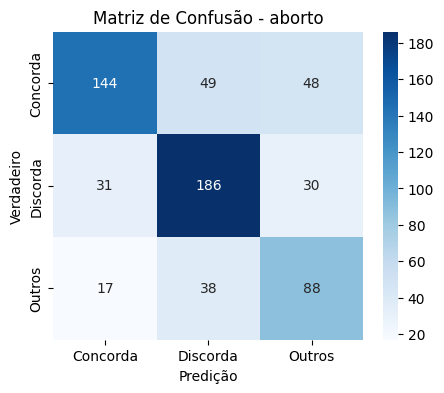


===== Assunto: drogas =====
Acurácia: 0.5917
Precisão: 0.6032
Revocação: 0.5917
F1-score: 0.5940

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.59      0.59      0.59       137
    Discorda       0.50      0.61      0.55       106
      Outros       0.69      0.58      0.63       144

    accuracy                           0.59       387
   macro avg       0.59      0.59      0.59       387
weighted avg       0.60      0.59      0.59       387



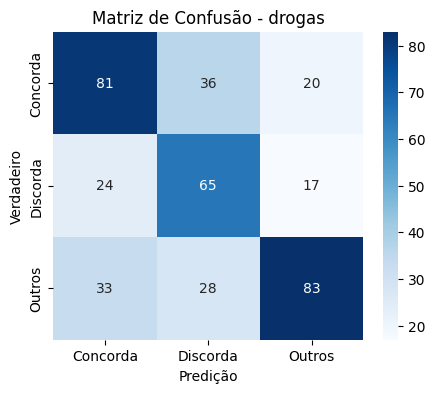


===== Assunto: pix =====
Acurácia: 0.6132
Precisão: 0.6402
Revocação: 0.6132
F1-score: 0.6204

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.47      0.63      0.54        81
    Discorda       0.53      0.54      0.53        67
      Outros       0.77      0.64      0.69       170

    accuracy                           0.61       318
   macro avg       0.59      0.60      0.59       318
weighted avg       0.64      0.61      0.62       318



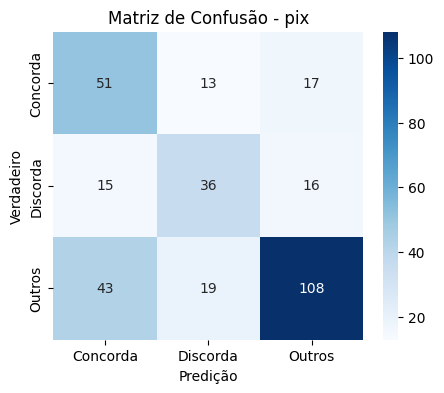


===== Assunto: sexualidade =====
Acurácia: 0.6329
Precisão: 0.6443
Revocação: 0.6329
F1-score: 0.6323

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.73      0.55      0.63       249
    Discorda       0.57      0.62      0.60       197
      Outros       0.61      0.72      0.66       235

    accuracy                           0.63       681
   macro avg       0.64      0.63      0.63       681
weighted avg       0.64      0.63      0.63       681



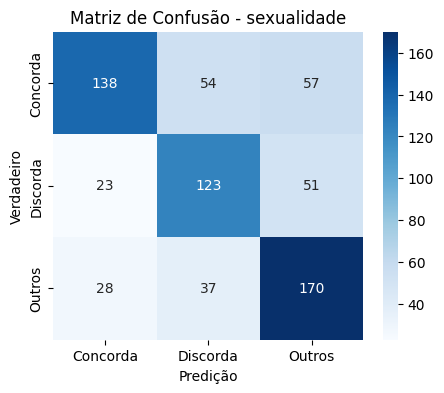

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop por cada assunto
for assunto, grupo in df_enriquecido.groupby("assunto"):
    print(f"\n===== Assunto: {assunto} =====")
    
    y_true = grupo['label_original']
    y_pred = grupo['classificacao']
    
    # Métricas
    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    revocacao = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Revocação: {revocacao:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y_true.unique()),
                yticklabels=sorted(y_true.unique()))
    plt.xlabel('Predição')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {assunto}')
    plt.show()

# Analisando os resultados do modelo pago

In [8]:
import pandas as pd
dados = pd.read_csv('checkpoint_resultados_completo_pago.csv', sep=',', decimal = ',', encoding = 'UTF-8')
dados.head(5)

,target_id,mensagem_id,message,target_message,parent_message,label_original,classificacao,justificativa,assunto
0,1,2,"E olha que aqui tá cheio de liberais no sub, m...",Eu acho que a direita está sendo hipócrita ao ...,"Incoerência da direita: pregam menos Estado, l...",Concorda,CONCORDA,A mensagem atual concorda com a crítica da men...,drogas
1,1,3,Daí dizem que defender o controle do Estado na...,Eu acho que a direita está sendo hipócrita ao ...,"E olha que aqui tá cheio de liberais no sub, m...",Concorda,CONCORDA,A mensagem atual reforça a crítica à hipocrisi...,drogas
2,1,4,Faz uma enquete sobre legalização do aborto pa...,Eu acho que a direita está sendo hipócrita ao ...,Daí dizem que defender o controle do Estado na...,Concorda,CONCORDA,"A mensagem atual, ao mencionar a questão do ab...",drogas
3,1,5,Pois é... outra vez: aborto não é questão de E...,Eu acho que a direita está sendo hipócrita ao ...,Faz uma enquete sobre legalização do aborto pa...,Concorda,CONCORDA,A mensagem atual concorda com a mensagem de re...,drogas
4,1,6,"Se depender dos conservadores, eles vão proibi...",Eu acho que a direita está sendo hipócrita ao ...,Pois é... outra vez: aborto não é questão de E...,Concorda,CONCORDA,"A mensagem atual, ao criticar a postura conser...",drogas


In [9]:
dados['classificacao'].value_counts()

classificacao
CONCORDA    309
DISCORDA    302
OUTROS      281
Name: count, dtype: int64

In [10]:
# normalizando a classificação para ficar igual a label
dados['classificacao'] = dados['classificacao'].str.capitalize()

In [11]:
dados['classificacao'].value_counts()

classificacao
Concorda    309
Discorda    302
Outros      281
Name: count, dtype: int64

Acurácia: 0.7265
Precisão: 0.7288
Revocação: 0.7265
F1-score: 0.7269
              precision    recall  f1-score   support

    Concorda       0.80      0.74      0.77       334
    Discorda       0.73      0.78      0.75       281
      Outros       0.65      0.66      0.66       277

    accuracy                           0.73       892
   macro avg       0.72      0.73      0.72       892
weighted avg       0.73      0.73      0.73       892



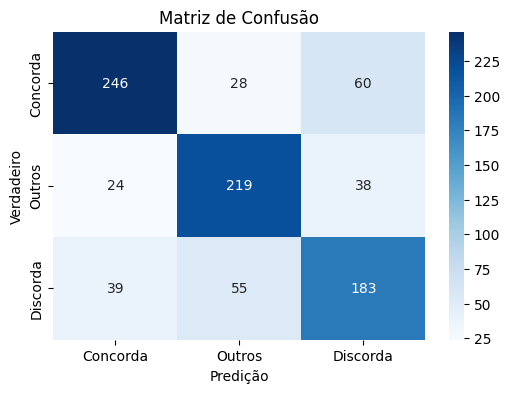

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# definindo o y verdadeiro e o y predito
y_true = dados['label_original']
y_pred = dados['classificacao']

# Calculando cada uma das métricas
acuracia = accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred, average='weighted')  # weighted para lidar com classes desbalanceadas
revocacao = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Revocação: {revocacao:.4f}")
print(f"F1-score: {f1:.4f}")

# obtendo o relatório completo de classificação
print(classification_report(y_true, y_pred))

# visualizando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dados['label_original'].unique(),
            yticklabels=dados['label_original'].unique())
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


===== Assunto: aborto =====
Acurácia: 0.7654
Precisão: 0.7719
Revocação: 0.7654
F1-score: 0.7660

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.86      0.73      0.79        98
    Discorda       0.76      0.85      0.80        92
      Outros       0.66      0.70      0.68        70

    accuracy                           0.77       260
   macro avg       0.76      0.76      0.76       260
weighted avg       0.77      0.77      0.77       260



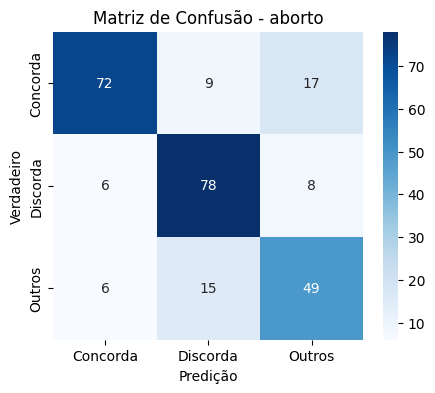


===== Assunto: drogas =====
Acurácia: 0.7080
Precisão: 0.7110
Revocação: 0.7080
F1-score: 0.7053

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.73      0.77      0.75       137
    Discorda       0.66      0.78      0.72       106
      Outros       0.73      0.59      0.65       144

    accuracy                           0.71       387
   macro avg       0.71      0.72      0.71       387
weighted avg       0.71      0.71      0.71       387



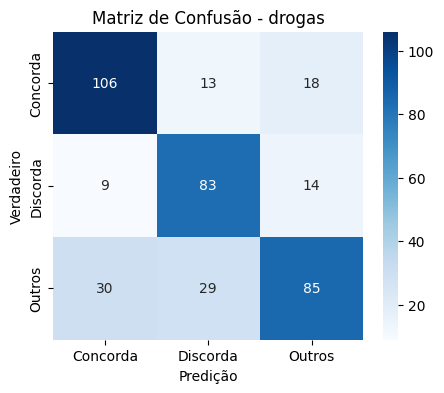


===== Assunto: sexualidade =====
Acurácia: 0.7143
Precisão: 0.7455
Revocação: 0.7143
F1-score: 0.7204

Relatório de Classificação:
              precision    recall  f1-score   support

    Concorda       0.85      0.69      0.76        99
    Discorda       0.77      0.70      0.73        83
      Outros       0.54      0.78      0.64        63

    accuracy                           0.71       245
   macro avg       0.72      0.72      0.71       245
weighted avg       0.75      0.71      0.72       245



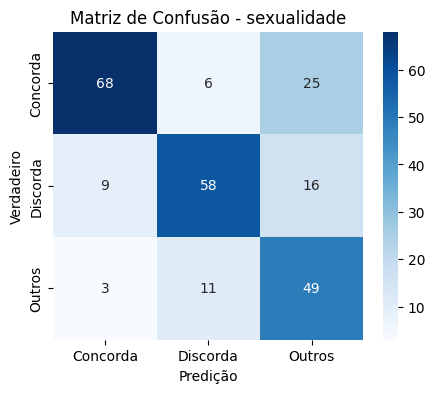

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loop por cada assunto
for assunto, grupo in dados.groupby("assunto"):
    print(f"\n===== Assunto: {assunto} =====")
    
    y_true = grupo['label_original']
    y_pred = grupo['classificacao']
    
    # Métricas
    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    revocacao = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Revocação: {revocacao:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y_true.unique()),
                yticklabels=sorted(y_true.unique()))
    plt.xlabel('Predição')
    plt.ylabel('Verdadeiro')
    plt.title(f'Matriz de Confusão - {assunto}')
    plt.show()